# Declaration of Originality

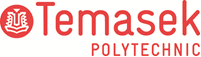

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jeff Sim Wei Zhi (2401685I)
* Tutorial Group                : C24B05
* Tutor						    : Kian Eng Ong
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [38]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Business Understanding

In [39]:
# Load the dataset
feature_description = pd.DataFrame({
    "Column": [
        "ID",
        "Marital Status",
        "Gender",
        "Income",
        "Children",
        "Education",
        "Occupation",
        "Home Owner",
        "Cars",
        "Commute Distance",
        "Region",
        "Age",
        "Purchased Bike"
    ],
    "Description": [
        "Unique customer identifier",
        "Marital status of the customer",
        "Gender of the customer",
        "Annual income of the customer",
        "Number of children the customer has",
        "Highest education level attained",
        "Occupation type of the customer",
        "Whether the customer owns a home",
        "Number of cars owned by the customer",
        "Distance travelled to work",
        "Geographical region of residence",
        "Age of the customer",
        "Target variable indicating whether a bike was purchased"
    ]
})

# Display the feature description
pd.set_option("display.max_colwidth", None)   
pd.set_option("display.width", None)          
feature_description

,Column,Description
0,ID,Unique customer identifier
1,Marital Status,Marital status of the customer
2,Gender,Gender of the customer
3,Income,Annual income of the customer
4,Children,Number of children the customer has
5,Education,Highest education level attained
6,Occupation,Occupation type of the customer
7,Home Owner,Whether the customer owns a home
8,Cars,Number of cars owned by the customer
9,Commute Distance,Distance travelled to work


### Goal: <br>
To predict whether a customer will purchase a bike based on their demographic and lifestyle information, allowing businesses to target high-probability customers more effectively. Through this predictive approach, companies are able to focus marketing efforts on customers who are most likely to convert, which allows them to reduce advertising expenses and lower customer acquisition costs. 

### Task: <br>
Classification

### Reason for task: <br>
The target variable Purchased Bike is discrete with two possible outcomes (Yes/No), and the task at hand is to assign each customer to one of the two classes based on the input features. Therefore, classification is the appropriate machine learning task for this problem.

# 2. Data Understanding

## 2.1 Load dataset

In [40]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'bike_buyers.csv'
df = pd.read_csv(FILE_PATH)
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


The output shows that the dataset has been loaded correctly.

The dataset shows how demographic and socio-economic features are represented for each observation alongside the target variable (Purchased Bike). Each row corresponds to a unique customer with a clean set of meaningful predictors.

The dataset contains an ID column. As it does not have any predictive meaning, it should be dropped before modelling.

## 2.2 Summary Statistics

In [41]:
## Get the shape of the DataFrame
df.shape

(1000, 13)

The dataset has 1000 samples (rows), and 13 columns.

In [42]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


The dataset contains 5 numeric columns and 8 categorical columns.

Numeric Columns - ID, Income, Children, Cars, and Age.

Categorical Columns - Marital Status, Gender, Education, Occupation, Home Owner, Commute Distance, Region, and Purchased Bike (Target)

As mentioned above, ID should be dropped before modelling due to having no predictive meaning. Therefore, excluding ID, there are 4 meaningful numeric features (Income, Children, Cars, Age).

Excluding Purchased Bike (target variable), there are 7 meaningful categorical features (Marital Status, Gender, Education, Occupation, Home Owner, Commute Distance, Region).

In [43]:
## Check for missing data
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

There are no missing values in the dataset, meaning that there is no need for imputation before analysis/modelling.

In [44]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

There are no duplicate rows in the dataset.

In [45]:
## Describe data distribution
df.describe(include='all')

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,2
top,NaN,Married,Male,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,No
freq,NaN,539,509,NaN,NaN,306,276,685,NaN,366,508,NaN,519
mean,19965.992000,NaN,NaN,56140.000000,1.908000,NaN,NaN,NaN,1.452000,NaN,NaN,44.190000,NaN
std,5347.333948,NaN,NaN,31081.609779,1.626094,NaN,NaN,NaN,1.124705,NaN,NaN,11.353537,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25.000000,NaN
25%,15290.750000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN
75%,24470.750000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN


The summary statistics show that the data is reasonably distributed.

Numeric features have reasonable ranges and distributions, indicating that there aren't any extreme skews/anomalous values that would hinder modelling.

Categorical features have a small number of unique categories, indicating a well-structured dataset where One-Hot Encoding can be performed without causing Curse Of Dimensionality during modelling.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [46]:
## Understanding distribution of target

# Specify target column
col_y = 'Purchased Bike'

# Display value counts for target column
df[col_y].value_counts()

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64

The target variable (Purchased Bike) is fairly balanced, with 519 customers who did not purchase a bike and 481 who did. As there is minimal class imbalance, it makes accuracy an appropriate evaluation metric for model evaluation.

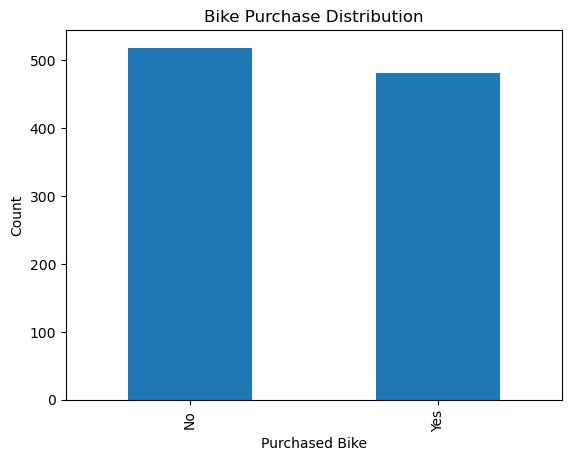

In [47]:
# Bar Chart distribution of target variable
df[col_y].value_counts().plot(kind='bar')

# Add titles and labels
plt.title('Bike Purchase Distribution')
plt.xlabel('Purchased Bike')
plt.ylabel('Count')

# Show plot
plt.show()

| Feature | Observed Trend | Implications for Modelling |
|--------|----------------|----------------------------|
| Purchased Bike | The number of customers who purchased a bike and those who did not is fairly balanced, with a slightly higher count for non-purchasers. This indicates no strong class imbalance in the target variable. | Accuracy is an appropriate evaluation metric because the classes are relatively balanced, and both correct positive and negative predictions are equally important in this classification task. |


### 2.3.1.2 Understanding distribution of continuous features

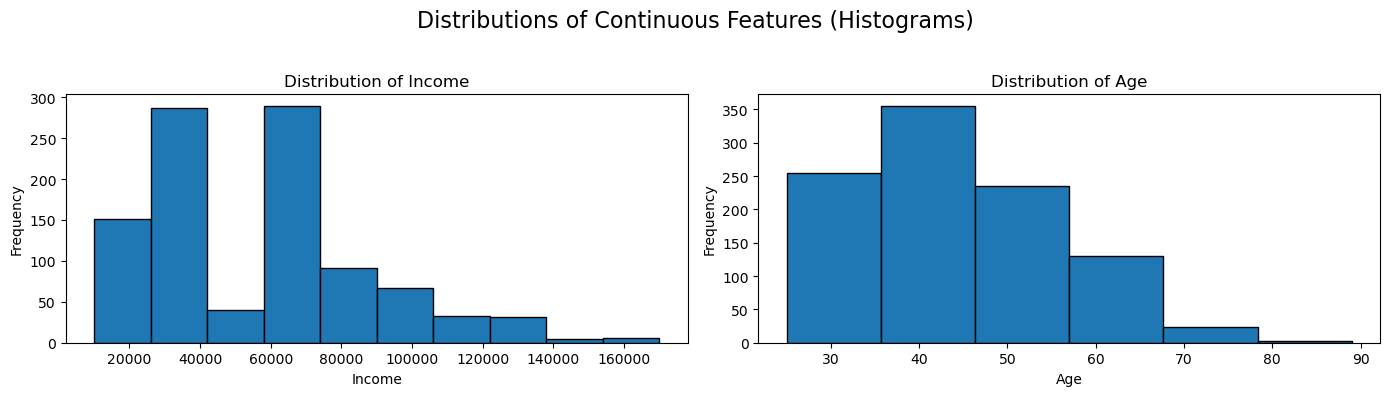

In [48]:
## Understanding distribution of continuous features

# Continuous features
continuous_features = [
    "Income",
    "Age"
]

# Custom bins per feature
bins_map = {
    "Income": 10,     
    "Age": 6
}

n_cols = 2
n_rows = math.ceil(len(continuous_features) / n_cols)

plt.figure(figsize=(14, 4 * n_rows))

for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=bins_map[col], edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.suptitle(
    "Distributions of Continuous Features (Histograms)",
    fontsize=16
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

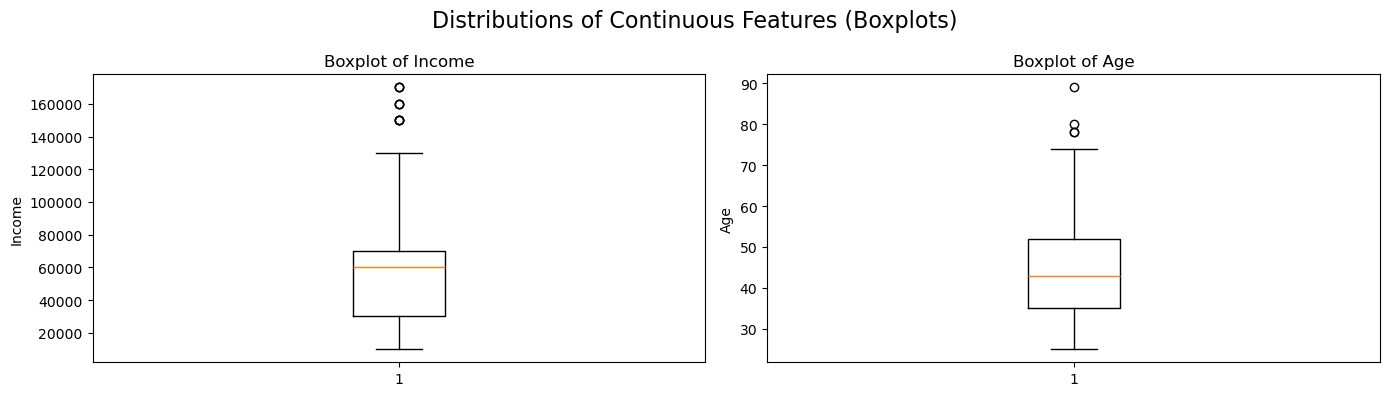

In [49]:
# Define no. of rows and columns for boxplot display
n_cols = 2
n_rows = math.ceil(len(continuous_features) / n_cols)
plt.figure(figsize=(14, 4 * n_rows))

# Plot boxplots for each continuous feature
for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i) 

    # Plot vertical boxplot
    plt.boxplot(df[col], vert=True) 

    # Set titles and labels
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

# Set overall title
plt.suptitle("Distributions of Continuous Features (Boxplots)", fontsize=16)

# Display the plots neatly
plt.tight_layout()
plt.show()

#### Summary of Histogram + Boxplot observations for continuous features

| Feature | Observed Trends (Histogram + Boxplot) | Outliers | Implications for Modelling |
|--------|--------------------------------------|----------|----------------------------|
| Income | • Strong right-skewed distribution, indicating that most individuals fall within lower–mid income levels while a small proportion earn substantially more<br><br>• Majority of values concentrated between around 25k and 75k, suggesting income is unevenly distributed across the population<br><br>• Median income approx 60k closer to the upper quartile<br><br>• Interquartile range (IQR) around 30k–70k reflects high variability within typical income levels<br><br>• Upper whisker extending to about 130k indicates a long tail of higher-income observations | • Several extreme high-income values around 150k–170k indicate rare but influential observations far from the central distribution | • Linear models such as Logistic Regression may be disproportionately influenced by extreme values, affecting coefficient estimation and decision boundaries<br><br>• Tree-based models (Decision Tree, Random Forest) are less sensitive as they rely on threshold-based splits rather than distance measures<br><br>• Gradient Boosting may place greater emphasis on extreme income values during sequential error correction, potentially amplifying their influence |
| Age | • Approximately unimodal distribution centered around middle age, indicating a predominantly working-age population<br><br>• Majority of observations between 30 and 55 years suggest limited age diversity at the extremes<br><br>• Median age 42 lying near the center of the IQR implies relatively balanced age representation<br><br>• IQR of around 35–52 shows moderate variability across typical age groups<br><br>• Upper whisker extending to approx 75 indicates gradual decline rather than abrupt cut-off at older ages | • Small number of high-age values around 78–90 suggest rare elderly observations with limited representation | • Logistic Regression captures age effects linearly, which is suitable given the relatively smooth distribution<br><br>• Tree-based models can naturally model non-linear age thresholds and interactions without being strongly affected by tail values<br><br>• The small number of age outliers has limited influence across all model types |

### 2.3.1.3 Understanding distribution of categorical features

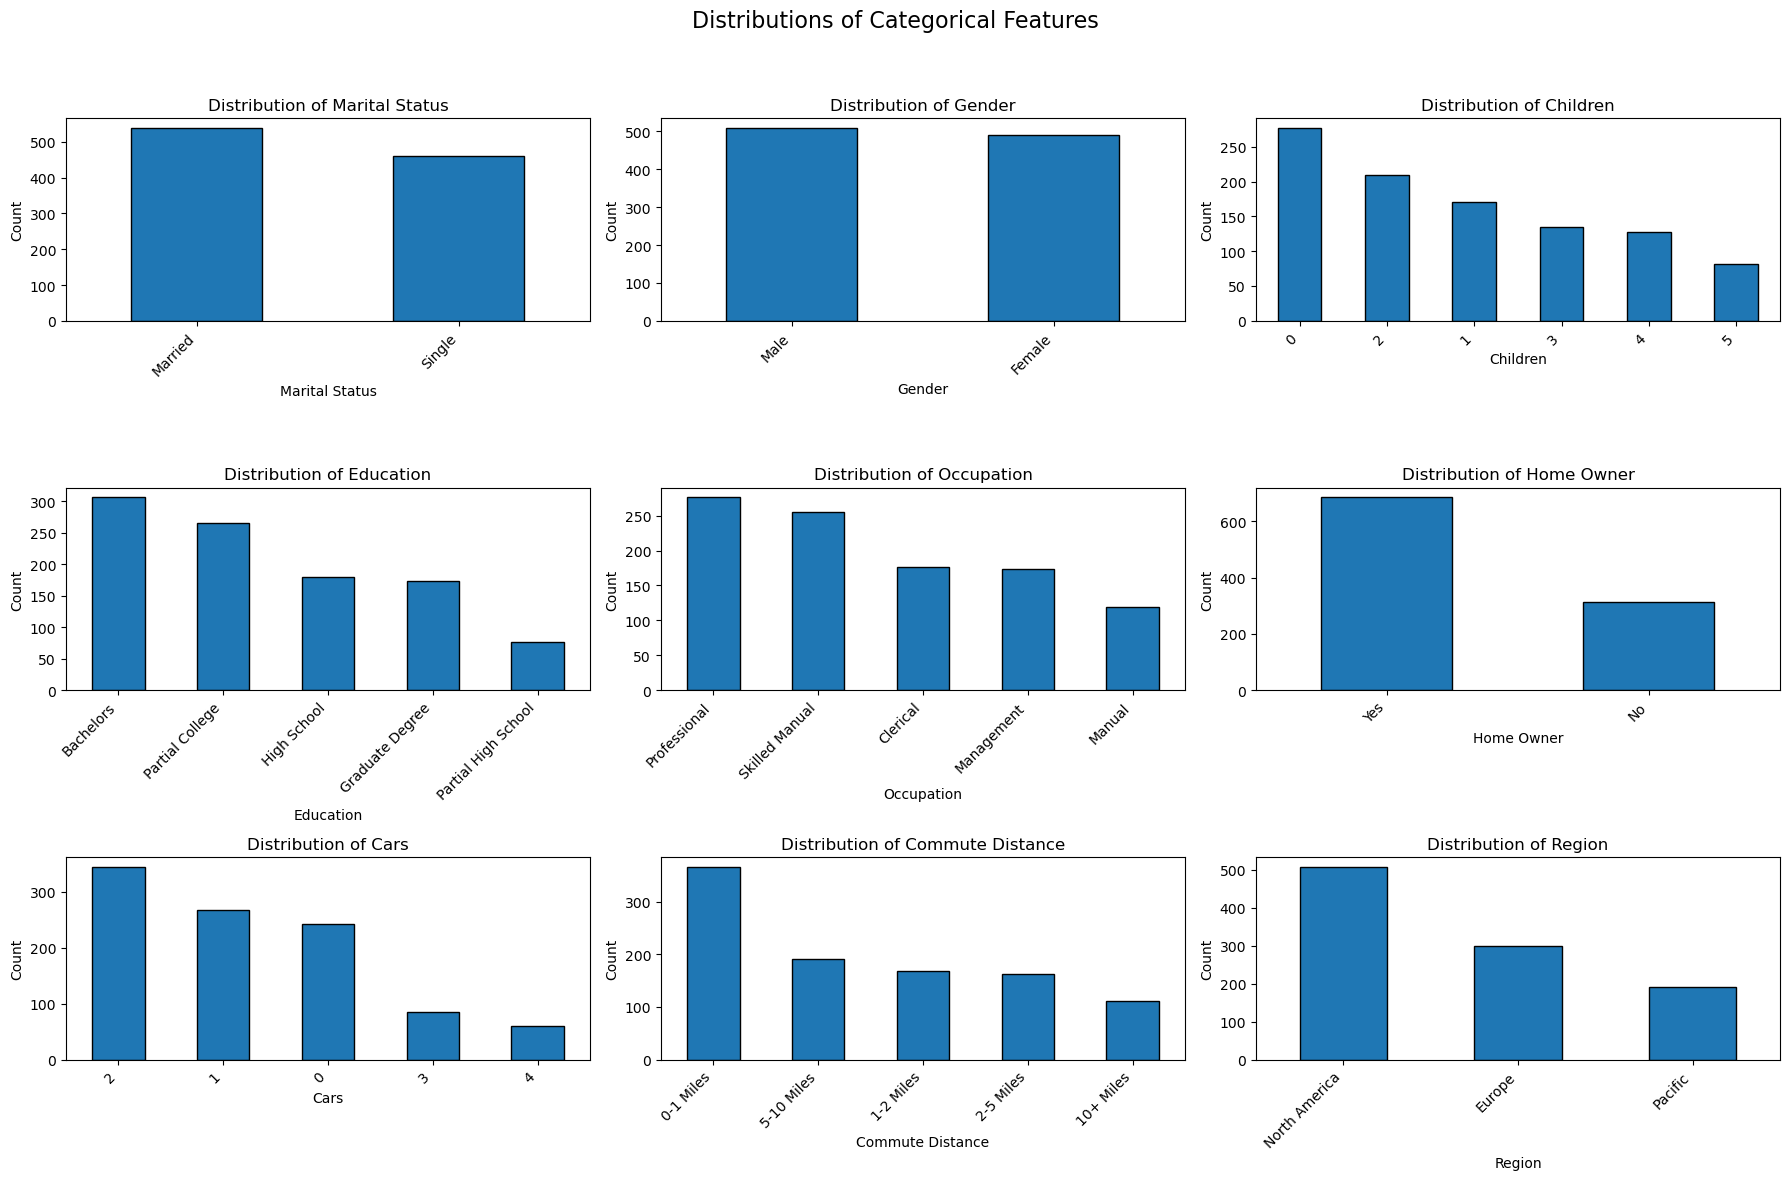

In [50]:
# Define categorical features for analysis
categorical_features = [
    "Marital Status",
    "Gender",
    "Children",
    "Education",
    "Occupation",
    "Home Owner",
    "Cars",
    "Commute Distance",
    "Region",
]

# Define no. of rows and columns for subplots
n_cols = 3
n_rows = math.ceil(len(categorical_features) / n_cols)
plt.figure(figsize=(18, 4 * n_rows))

# Plot bar charts for each categorical feature
for i, col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)

    # Plot bar chart
    df[col].value_counts().plot(kind="bar", edgecolor="black")

    # Set titles and labels
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")

# Set overall title
plt.suptitle(
    "Distributions of Categorical Features",
    fontsize=16
)

# Display the plots neatly
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

| Feature | Observed Trends (Categorical Distributions) | Outliers / Imbalance | Implications for Modelling |
|--------|---------------------------------------------|----------------------|----------------------------|
| Marital Status | • Married and Single are both common, with Married slightly more frequent, showing a fairly even split between the two groups | • No strong imbalance between categories | • Balanced categories allow models to learn patterns without strong bias<br><br>• Logistic Regression treats marital status linearly after encoding, while tree-based models can capture interactions with other features |
| Gender | • Male and Female counts are almost equal, indicating a good gender balance in the dataset | • No outliers or imbalance observed | • Balanced representation reduces bias across all models<br><br>• Tree-based models can better capture interactions involving gender |
| Children | • Most individuals have 0–2 children<br><br>• Fewer individuals have larger numbers of children | • Households with 4–5 children are relatively uncommon | • Linear models may assume a steady increase or decrease in effect with more children<br><br>• Tree-based models can capture threshold effects such as larger households |
| Education | • Bachelor’s and Partial College are the most common education levels<br><br>• Lower education levels appear less frequently | • Partial High School has noticeably fewer observations | • Rare education categories may have weaker influence in linear models<br><br>• Tree-based models can still split effectively on education levels |
| Occupation | • Professional and Skilled Manual jobs are most common<br><br>• Manual and Clerical roles appear less often | • Manual jobs form the smallest group | • One-hot encoding may lead to sparse features for rare occupations<br><br>• Tree-based models can still use these categories through selective splits |
| Home Owner | • Most individuals are home owners<br><br>• Fewer individuals are non-home owners | • Number of home owners is significantly higher than non-home owners | • Imbalance may reduce the impact of the minority category in linear models<br><br>• Tree-based models are less affected by this imbalance |
| Cars | • Owning 1–2 cars is most common<br><br>• Very few individuals own many cars | • Ownership of 3–4 cars is relatively rare | • Linear models assume a consistent effect per additional car<br><br>• Tree-based models can capture non-linear ownership patterns |
| Commute Distance | • Short commutes (0–1 miles) are most common<br><br>• Longer commutes become less frequent | • Very long commutes (10+ miles) are least common | • Linear models may oversimplify distance effects<br><br>• Tree-based models can capture changes at distance thresholds |
| Region | • Most individuals are from North America<br><br>• Europe and Pacific have fewer observations | • Pacific region has the lowest representation | • Regional imbalance may bias linear models toward dominant regions<br><br>• Tree-based models can still use regional splits, though minority regions contribute less |


### 2.3.2.1 Understanding relationship between continuous variables

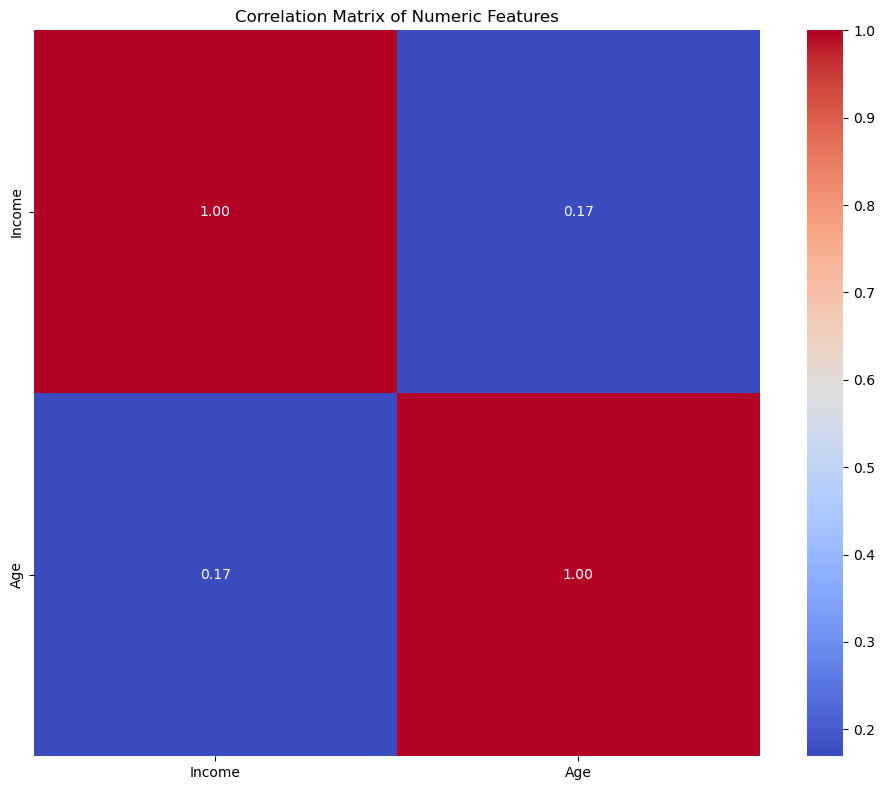

In [51]:
## Understanding relationship between continuous variables

# Compute correlation matrix for continuous features
corr = df[continuous_features].corr()

# Define figure size of heatmap
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(
    corr, # Define correlation matrix
    annot=True, # Show annotations
    fmt=".2f", # Define annotation format
    cmap="coolwarm", # Color map
    square=True # Square cells
)

# Set overall title
plt.title("Correlation Matrix of Numeric Features")

# Display the heatmap neatly
plt.tight_layout()
plt.show()

| Feature Pair | Observed Relationship | Interpretation | Implications for Modelling |
|-------------|----------------------|----------------|----------------------------|
| Income & Age | Weak positive correlation (approx 0.17) | As age increases, income tends to increase slightly, but the relationship is weak and not strongly linear | The low correlation suggests limited multicollinearity risk for linear models such as Logistic Regression. Both features can contribute independent information. Tree-based models can still capture non-linear or interaction effects between age and income without relying on correlation strength. |


### 2.3.2.2 Understanding relationship between continuous variables and target

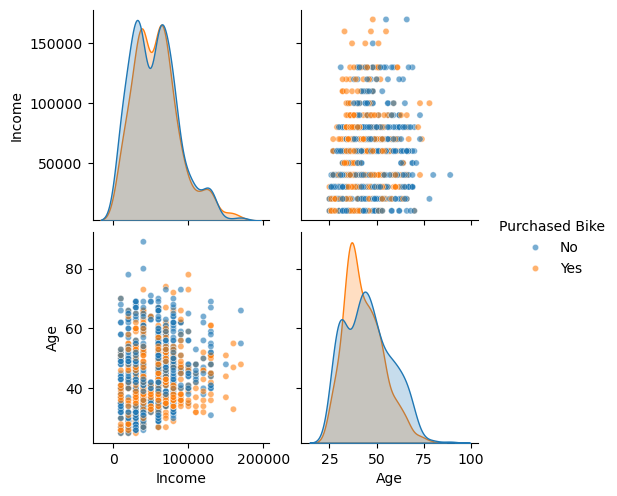

In [52]:
# Understanding pairwise relationships between continuous features and target
sns.pairplot(
    df, # Define cleaned DataFrame for plotting
    vars=continuous_features, # Define continuous features for plotting
    hue="Purchased Bike", # Define target variable for hue
    diag_kind="kde", # Define diagonal plot type
    plot_kws={"s": 20, "alpha": 0.6} # Define plot aesthetics
)

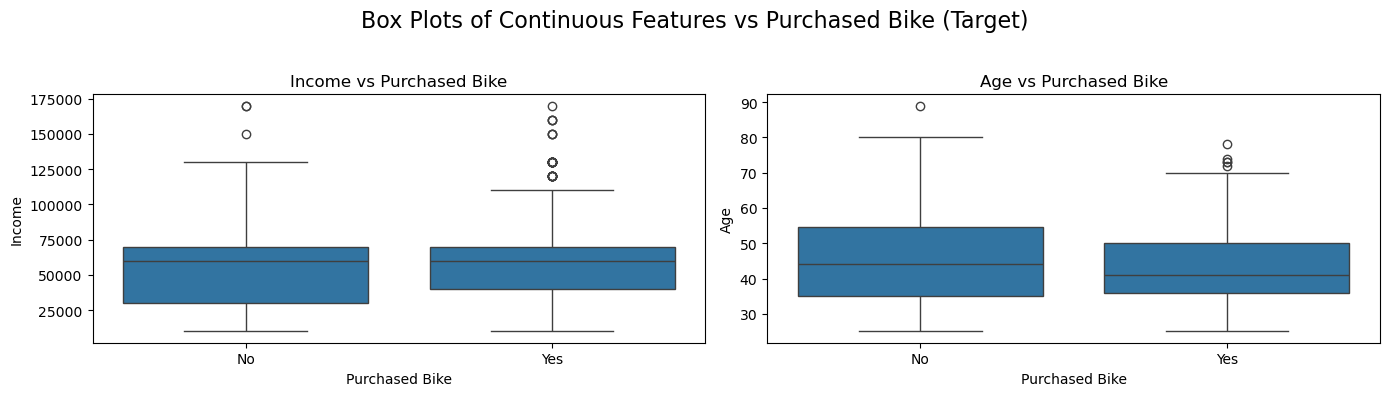

In [53]:
## Box plots of continuous features vs target

# Define number of rows and columns for subplots
n_cols = 2
n_rows = math.ceil(len(continuous_features) / n_cols)
plt.figure(figsize=(14, 4 * n_rows))

# Create box plots for each continuous feature against the target
for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot boxplot
    sns.boxplot(x="Purchased Bike", y=col, data=df)

    # Set titles and labels
    plt.title(f"{col} vs Purchased Bike")
    plt.xlabel("Purchased Bike")
    plt.ylabel(col)

# Set overall title
plt.suptitle(
    "Box Plots of Continuous Features vs Purchased Bike (Target)",
    fontsize=16
)

# Display the plots neatly
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Summary of pair plot and box plot observations for continuous features vs target

| Feature | Observed Trends (vs Purchased Bike) | Outliers | Implications for Modelling |
|--------|-------------------------------------|----------|----------------------------|
| Income | The income distributions for the No/Yes class are very close and share almost the same median. However, the interquartile range for those who purchased a bike is slightly higher than for those who did not, indicating that purchasers generally fall into higher income brackets.<br><br>As there is a strong overlap between the two classes, it indicates income alone has a weak-moderate influence on the target and does not create a clear separation between the two target classes. | High-income outliers are present in both purchasers and non-purchasers, with several values above 150k–170k. These extreme values are relatively few compared to the overall population. | The overlap indicates income alone is not a strong predictor but can still contribute useful signal when combined with other features. Linear models may be influenced by extreme income values, while tree-based models can handle the spread and capture non-linear income thresholds associated with purchase behaviour. |
| Age | Bike purchasers tend to be slightly younger on average, as seen by the median age for those who purchased a bike being lower than for those who did not. The interquartile range for purchasers is slightly narrower and shifted towards younger ages compared to non-purchasers, suggesting a more concentrated age range among buyers. <br><br>Despite these observations, there is still significant overlap for age distributions between the two target classes, indicating that age alone also has a weak-moderate influence on the target, and is also unable to clearly separate between the two target classes. | A small number of older individuals (>70 years old) appear in both classes, forming mild high-age outliers. | The gradual shift suggests age provides weak but meaningful predictive information. Linear models capture this effect as a smooth trend, while tree-based models can learn age ranges or thresholds that are more associated with purchasing behaviour. |

### 2.3.2.3 Understanding relationship between categorical variables and target

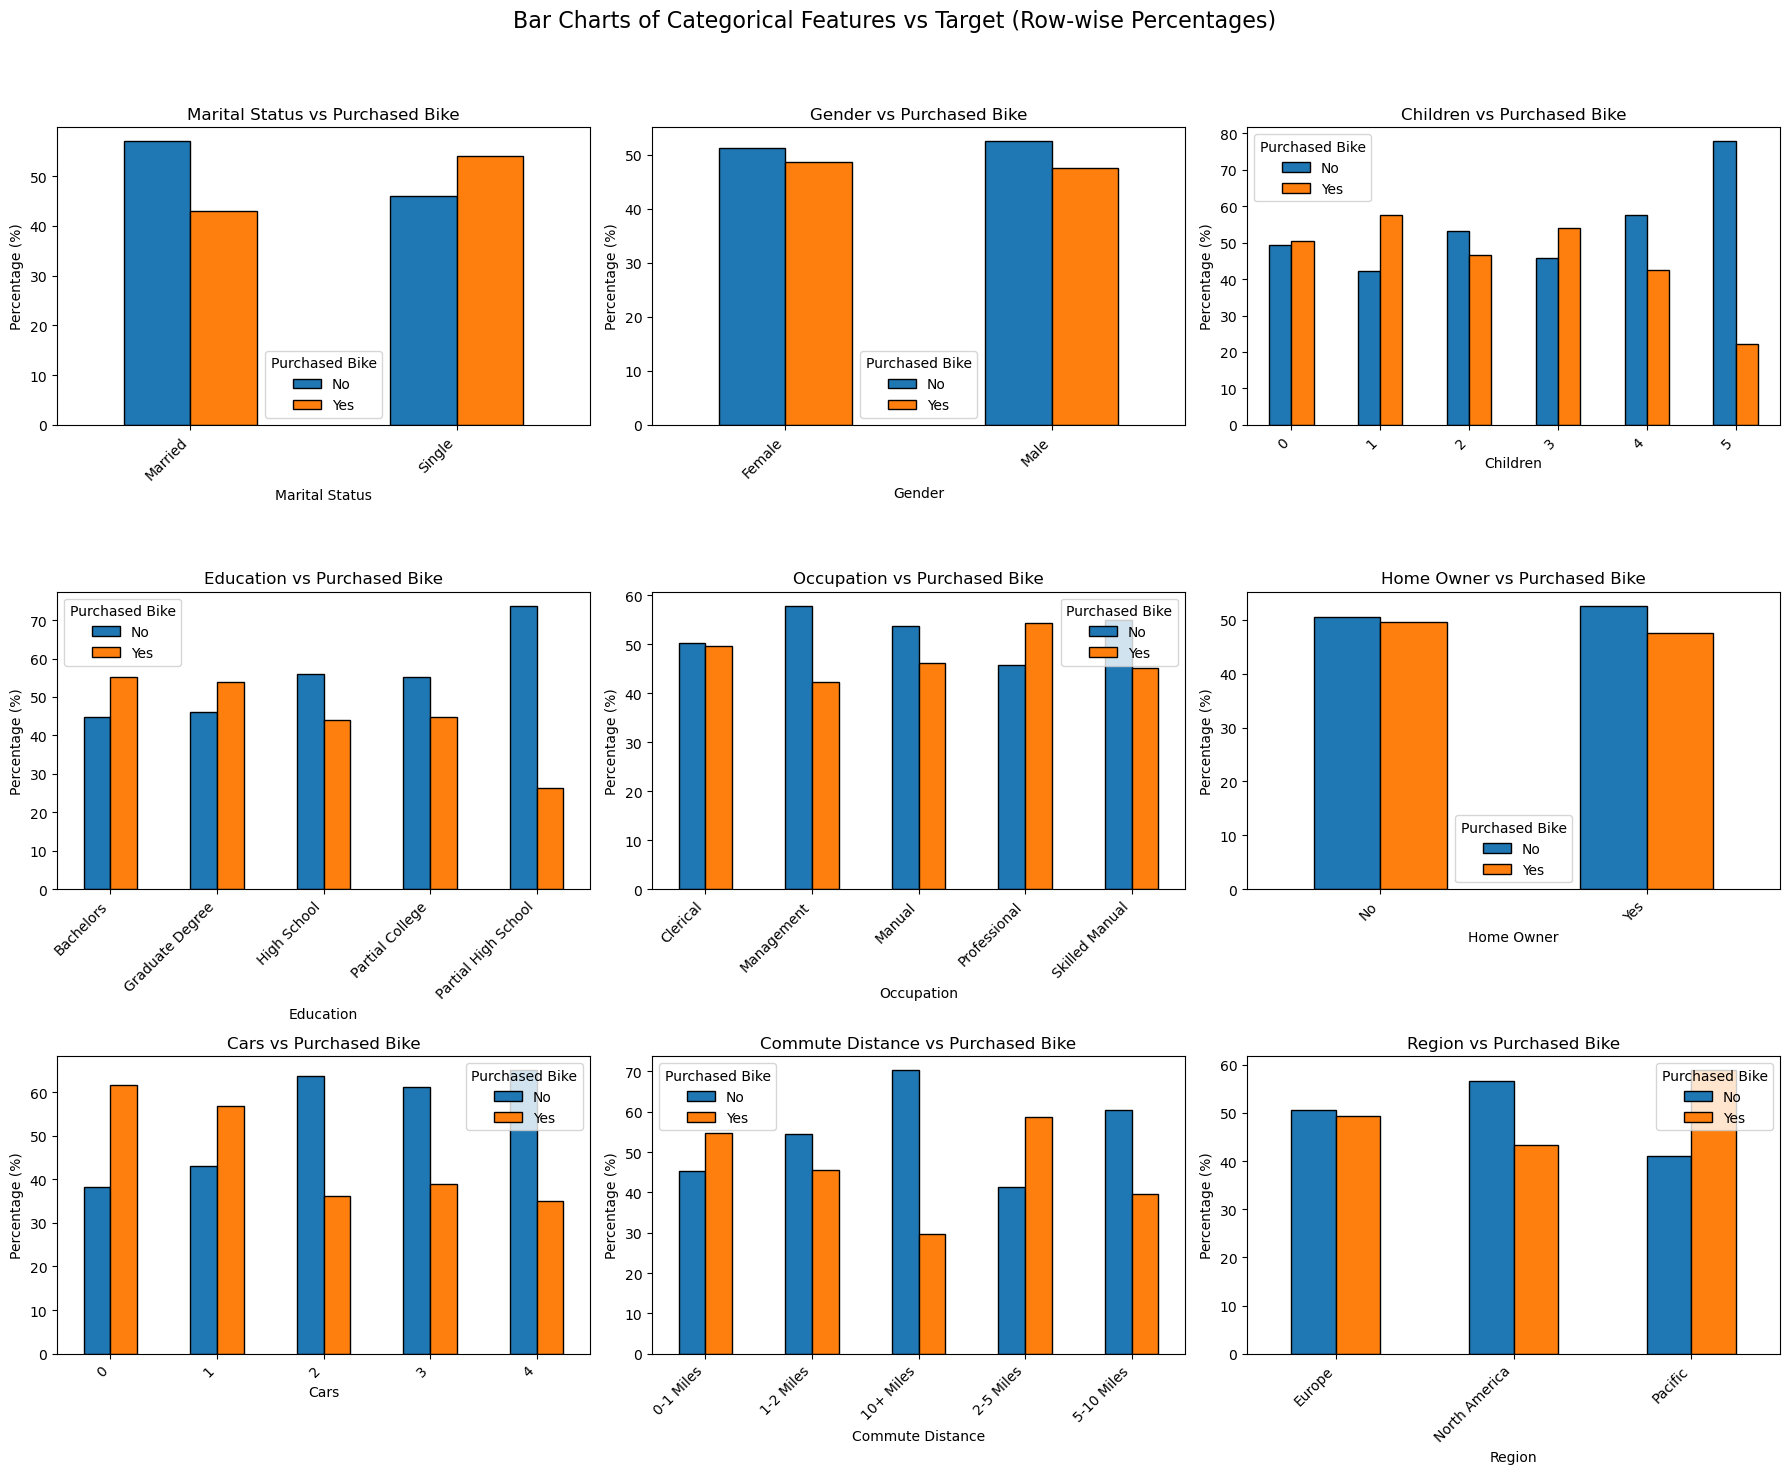

In [54]:
## Understanding relationship between categorical features and target

# Define number of rows and columns for subplots
n_cols = 3
n_rows = math.ceil(len(categorical_features) / n_cols)
plt.figure(figsize=(18, 5 * n_rows))

# Plot bar charts for each categorical feature against the target
for i, col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create cross-tabulation of feature vs target with row-wise percentages
    ct_pct = pd.crosstab(
        df[col],
        df[col_y],
        normalize="index"
    ) * 100
    
    # Plot the cross-tabulation as a bar chart
    ct_pct.plot(
        kind="bar",
        ax=plt.gca(),
        edgecolor="black"
    )
    
    # Set plot titles and labels
    plt.title(f"{col} vs {col_y}")
    plt.xlabel(col)
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title=col_y)

# Overall title
plt.suptitle(
    "Bar Charts of Categorical Features vs Target (Row-wise Percentages)",
    fontsize=16
)

# Display the plots neatly
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Most Influential Categorical Features
| Feature | Observed Trends (vs Purchased Bike) | Outliers / Imbalance | Implications for Modelling |
|--------|-------------------------------------|----------------------|----------------------------|
| Cars | Customers with 0-1 cars have a noticeably higher percentage of bike purchases, while purchase rates drop as the number of cars increases, indicating that Cars and Purchased Bike (target) are inversely related. | Higher car ownership levels (3-4 cars) have fewer purchasers, creating strong imbalance at higher values. | Observing that there is a clear pattern between this feature and the target, it is seen that this feature is highly predictive. Linear models may capture a general decreasing trend, while tree-based models can learn strong thresholds (e.g., < or = 1 car vs > or = 2 cars). |
| Commute Distance | Shorter commute distances (0-1 miles, 2-5 miles) show higher bike purchase rates, while long commutes (10+ miles) have significantly lower purchase rates. This indicates bike usage is more practical for shorter commutes. | Long-distance commuters (10+ miles) form a smaller group with notably lower purchase rates. | The strong pattern indicates high predictive value. Tree-based models can effectively learn distance thresholds, while linear models may oversimplify the non-linear relationship. |
| Education | Higher education levels (Bachelor’s, Graduate Degree) show higher purchase rates compared to lower education levels, especially Partial High School. This suggests education level is linked to purchasing behaviour. | Partial High School is underrepresented and shows much lower purchase rates. | Education provides meaningful signal. Rare categories may have weaker influence in linear models, while tree-based models can isolate education levels through splits. |
| Children | As the number of children increases, the percentage of customers who purchased a bike decreases, while the percentage of non-purchasers increases, indicating an inverse relationship between Children and Purchased Bike. | Higher numbers of children (4–5) are less common, resulting in fewer observations in these categories. | The clear opposing trend between the Yes and No classes suggests this feature provides useful predictive information. Linear models may capture a general decreasing trend, while tree-based models can learn thresholds such as smaller versus larger household sizes. |


##### Less Influential Categorical Features
| Feature | Observed Trends (vs Purchased Bike) | Outliers / Imbalance | Implications for Modelling |
|--------|-------------------------------------|----------------------|----------------------------|
| Marital Status | Married and Single individuals show similar purchase rates, with only minor differences between the two groups. This indicates weak separation between target classes. | No strong imbalance between categories. | Limited standalone predictive power. Models may only extract small signal when combined with other features. |
| Gender | Male and Female purchase percentages are very similar, indicating little to no effect of gender on bike purchasing behaviour. | No imbalance observed. | Minimal contribution to prediction. Useful mainly for interaction effects in tree-based models. |
| Occupation | Purchase rates vary slightly across occupations, but differences are inconsistent and overlapping across categories. | Some occupations have fewer observations, leading to mild imbalance. | Weak individual predictive strength. Tree-based models may capture interactions, but linear models gain limited benefit. |
| Home Owner | Home owners and non-home owners show very similar purchase percentages, suggesting ownership status does not strongly influence bike purchases. | Non-home owners form a smaller group. | Low predictive importance. Any contribution is likely secondary and interaction-based. |
| Region | Europe, North America, and Pacific show some variation in purchase rates, but differences are not large enough to clearly separate classes. | Pacific region has fewer observations. | Region provides limited standalone signal and is more useful when combined with other features. |

# 3. Data Preparation

## 3.1 Data Cleaning

In [55]:
## Clean data

# Work on a copy to preserve original data

df_model = df.copy()


# Drop ID column, as it is non-informative
df_model = df_model.drop(columns=["ID"], errors="ignore")

# Display cleaned dataframe to verify
df_model

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


## 3.2 Train-Test Split

In [56]:
## Identify numeric columns
col_numeric = df_model.select_dtypes(include=['int64', 'float64']).columns
col_numeric

Index(['Income', 'Children', 'Cars', 'Age'], dtype='object')

In [57]:
# Identify categorical columns that need to be encoded
col_categorical = df_model.select_dtypes(include=['object']).columns

# Display unique values for categorical columns 
for col in df_model[col_categorical]:
    print(f'{col} ({df_model[col].nunique()}): {df_model[col].unique()}')

Marital Status (2): ['Married' 'Single']
Gender (2): ['Female' 'Male']
Education (5): ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation (5): ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner (2): ['Yes' 'No']
Commute Distance (5): ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region (3): ['Europe' 'Pacific' 'North America']
Purchased Bike (2): ['No' 'Yes']


In [58]:
## Prepare data for modeling

# Define target variable
y = df_model[col_y]

# Define feature set
X = df_model.drop(columns=[col_y])

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(X, drop_first=True)

# Display feature set to be used for modeling
X

,Income,Children,Cars,Age,Marital Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,...,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_North America,Region_Pacific
0,40000,1,0,42,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1,30000,3,1,43,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,80000,5,2,60,False,True,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
3,70000,0,1,41,True,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True
4,30000,0,0,36,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000,2,2,54,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
996,70000,4,0,35,True,True,True,False,False,False,...,False,True,False,True,False,False,True,False,True,False
997,60000,2,0,38,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
998,100000,3,3,38,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [59]:
## Split data into train set and test set
test_size = 0.3
random_state = 2026
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [60]:
## Initialise and train Logistic Regression model (Baseline)
logr = LogisticRegression(random_state=2026)
logr.fit(X_train, y_train)

c:\Users\Jeff Sim\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2026
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [61]:
## Initialise and train Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=2026)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2026
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [62]:
## Initialise and train Random Forest Classifier model
rf = RandomForestClassifier(random_state=2026)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
## Initialise and train Gradient Boosting Classifier model
gb = GradientBoostingClassifier(random_state=2026)
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [64]:
## Evaluate Logistic Regression model
y_pred_logr = logr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_logr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logr))

Accuracy: 0.6233333333333333
Logistic Regression Confusion Matrix:
 [[106  50]
 [ 63  81]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.68      0.65       156
         Yes       0.62      0.56      0.59       144

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.62      0.62      0.62       300



In [65]:
## Evaluate Random Forest Classifier model
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7333333333333333
Random Forest Confusion Matrix:
 [[121  35]
 [ 45  99]]
Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.73      0.78      0.75       156
         Yes       0.74      0.69      0.71       144

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [66]:
## Evaluate Decision Tree Classifier model
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7166666666666667
Decision Tree Confusion Matrix:
 [[118  38]
 [ 47  97]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

          No       0.72      0.76      0.74       156
         Yes       0.72      0.67      0.70       144

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [67]:
## Evaluate Gradient Boosting Classifier model
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.6966666666666667
Gradient Boosting Confusion Matrix:
 [[113  43]
 [ 48  96]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

          No       0.70      0.72      0.71       156
         Yes       0.69      0.67      0.68       144

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



## Model Comparison
### Test Set Results with baseline comparison
| Model                          | Accuracy | Comparison to Logistic Regression |
|--------------------------------|---------:|----------------------------------|
| Logistic Regression (Baseline) | 0.62 | Baseline performance |
| Decision Tree                  | 0.72 | +0.10 improvement in accuracy | 
| Random Forest                  | 0.73 | +0.11 improvement in accuracy | 
| Gradient Boosting              | 0.70 | +0.08 improvement in accuracy | 


### Quantitative Comparison

| Model               | Accuracy | Relative Performance                          |
| ------------------- | -------: | --------------------------------------------- |
| Logistic Regression |     0.62 | Lowest performance among all models           |
| Gradient Boosting   |     0.70 | Moderate improvement over Logistic Regression |
| Decision Tree       |     0.72 | Strong performance, second highest accuracy   |
| Random Forest       |     0.73 | Best overall accuracy                         |

### Qualitative Comparison

| Model | Qualitative Comparison |
|------|------------------------|
| Logistic Regression | • Assumes linear relationships between features and bike purchase outcome<br><br>• Unable to capture complex interactions between demographic and lifestyle variables<br><br>• Serves well as a baseline but underfits the data |
| Decision Tree | • Captures non-linear relationships through decision rules<br><br>• Easy to understand at a high level<br><br>• Can be sensitive to small changes in the training data, affecting stability |
| Random Forest | • Combines multiple decision trees to reduce overfitting<br><br>• Produces more stable and consistent predictions than a single tree<br><br>• Handles complex feature interactions effectively |
| Gradient Boosting | • Learns sequentially by focusing on previous prediction errors<br><br>• Can model complex patterns but requires careful tuning<br><br>• Performance gains are smaller compared to Random Forest for this dataset |


### Selected Model + Rationale for selection

I selected the Random Forest model as it provides the best predictive performance on the test set of the 4 models, achieving the highest accuracy of 0.73. This performance shows that it generalises better to unseen data as compared to the baseline as well as the other tree-based models.

From a modelling perspective, the Random Forest model is very well-suited to this problem as it is able to capture both complex and non-linear relationships between demographic and lifestyle features that influence bike purchasing behaviour. Unlike Logistic Regression, which assumes linear relationships and struggles to model complex and non-linear relationships, Random Forest can naturally learn non-linear patterns. Compared to Gradient Boosting, Random Forest is more stable and less prone to overfitting as it reduces variance by averaging the predictions of multiple trees rather than learning sequentially from errors. By aggregating multiple decision trees, Random Forest is also able to produce more reliable predictions compared to a single Decision Tree.

While Random Forest is more difficult to interpret compared to simpler models such as Logistic Regression or a single Decision Tree, detailed interpretability is not a requirement for my deployed solution. My deployed solution focuses on providing accurate predictions of bike purchasing behaviour rather than on transparent decision explanations. Therefore, predictive performance is of higher priority than interpretability. As Random Forest provides the highest accuracy on unseen data among the 4 models, its reduced interpretability is a valid trade-off in exchange for stronger predictive performance.

In summary, due to Random Forest achieving the highest accuracy on unseen data of the 4 models and interpretability being a low priority for my deployed solution, the Random Forest model will be selected.


In [68]:
## New data
X_new = pd.DataFrame([
    {
        "Income": 60000,
        "Children": 1,
        "Cars": 0,
        "Age": 35,
        "Marital Status_Single": True,
        "Gender_Male": True,
        "Education_Graduate Degree": False,
        "Education_High School": False,
        "Education_Partial College": True,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": False,
        "Occupation_Professional": True,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": True,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": True,
        "Region_Pacific": False
    },
    {
        "Income": 90000,
        "Children": 3,
        "Cars": 2,
        "Age": 70,
        "Marital Status_Single": False,
        "Gender_Male": False,
        "Education_Graduate Degree": True,
        "Education_High School": False,
        "Education_Partial College": False,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": False,
        "Occupation_Professional": True,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": False,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": True,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": True,
        "Region_Pacific": False
    },
    {
        "Income": 100000,
        "Children": 3,
        "Cars": 1,
        "Age": 49,
        "Marital Status_Single": True,
        "Gender_Male": True,
        "Education_Graduate Degree": False,
        "Education_High School": True,
        "Education_Partial College": False,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": True,
        "Occupation_Professional": False,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": False,
        "Commute Distance_1-2 Miles": True,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": False,
        "Region_Pacific": True
    },
    {
        "Income": 120000,
        "Children": 2,
        "Cars": 2,
        "Age": 50,
        "Marital Status_Single": False,
        "Gender_Male": True,
        "Education_Graduate Degree": True,
        "Education_High School": False,
        "Education_Partial College": False,
        "Education_Partial High School": False,
        "Occupation_Management": True,
        "Occupation_Manual": False,
        "Occupation_Professional": False,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": False,
        "Commute Distance_10+ Miles": True,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": True,
        "Region_Pacific": False
    },
    {
        "Income": 85000,
        "Children": 1,
        "Cars": 1,
        "Age": 44,
        "Marital Status_Single": False,
        "Gender_Male": False,
        "Education_Graduate Degree": False,
        "Education_High School": False,
        "Education_Partial College": True,
        "Education_Partial High School": False,
        "Occupation_Management": True,
        "Occupation_Manual": False,
        "Occupation_Professional": False,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": False,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": True,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": False,
        "Region_Pacific": True
    }
])

## Predict
y_pred_new = rf.predict(X_new)
y_prob = rf.predict_proba(X_new)

results = X_new.copy()
results["Predicted_Purchased_Bike"] = y_pred_new
results["Probability_Yes"] = y_prob[:, 1]

results[["Predicted_Purchased_Bike", "Probability_Yes"]]

,Predicted_Purchased_Bike,Probability_Yes
0,Yes,0.835
1,No,0.380
2,Yes,0.730
3,No,0.210
4,Yes,0.690


## Iterative model development


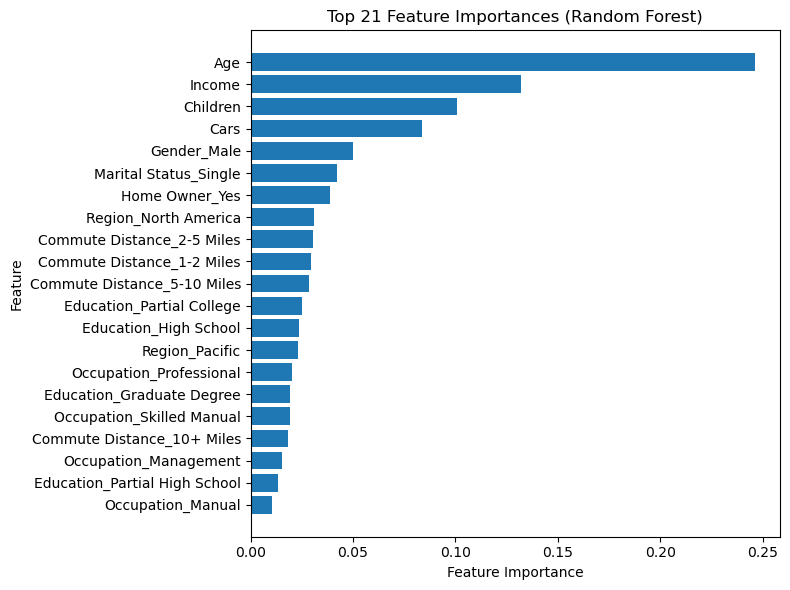

In [69]:
## Plot feature importance
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

## Display all feature importances
TOP_N = 21

## Get top N important features
top_imp = importance.head(TOP_N).sort_values(by="importance")

## Plot horizontal bar chart of all feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_imp["feature"], top_imp["importance"])

## Set titles and labels
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title(f"Top {TOP_N} Feature Importances (Random Forest)")

## Display the plot neatly
plt.tight_layout()
plt.show()

### Interpretation of Feature Importance (Random Forest)

**Model insight**  
The feature importance plot shows that Age, Income, Children, and Cars contribute most strongly to the model, which shows that demographic and household factors have the heaviest influence on bike-purchase predictions.

**Implications for modelling**  
Feature importance decreases gradually rather than dropping sharply. This suggests that the model is relying on a combination of variables rather than on a single dominant predictor. It seen that there are no extremely low-importance features, which indicates that most features provide some predictive value instead of just acting as noise.

**Implications for feature engineering**  
As observed, no features have near-zero importance, which means that aggressive feature removal is unjustified and mostly hurts Random Forest model performance. Therefore, no features were dropped as part of feature selection.

In [70]:
## Further feature engineering / feature selection

# Feature engineering 1: Create age groups

# Create copy of original dataframe
df_iterative_model = df_model.copy()

# Create age groups, 5 bins with labels
df_iterative_model["age_group"] = pd.cut(
    df_iterative_model["Age"],
    bins=[0, 30, 40, 50, 60, 100],
    labels=["<30", "30-40", "40-50", "50-60", "60+"]
)

# Drop original Age column
df_iterative_model = df_iterative_model.drop(columns=["Age"])

# Display modified dataframe to verify
df_iterative_model

# Data preparation for feature engineered model
y = df_iterative_model[col_y]

X = df_iterative_model.drop(columns=[col_y])

X = pd.get_dummies(X, drop_first=True)

X

# Split data into train set and test set
test_size = 0.3
random_state = 2026
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Initialise and train Random Forest model on feature engineered data
rf_fe = RandomForestClassifier(random_state=2026)
rf_fe.fit(X_train, y_train)

# Evaluate feature engineered model
y_pred_rf_fe = rf_fe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_fe))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_fe))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_fe))

Accuracy: 0.7433333333333333
Random Forest Confusion Matrix:
 [[129  27]
 [ 50  94]]
Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.72      0.83      0.77       156
         Yes       0.78      0.65      0.71       144

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.74      0.74       300



### Reason for Age Group Feature Engineering

#### 1) What the data suggested  
The age distribution is uneven and most customers were concentrated in the working-adult age range of about 30-50, with fewer samples at the extremes. The original dataframe, which uses raw `Age`, exposes the model to many closely packed values in dense regions. Minor differences such as 41 vs 42 appear meaningful despite being unlikely to reflect real differences in bike purchasing behaviour.

#### 2) Why this affects Random Forest specifically  
For continuous features, Random Forest evaluates many possible split points. In dense age ranges, several thresholds may lead to a slight reduction in impurity due to sampling variation. As my dataset is quite small, with 1000 records, this can lead to fine-grained splits that are unstable and do not generalise well.

#### 3) What age grouping changes  
By converting `Age` into `age_group`, the resolution of the feature is reduced, preventing splits on small age differences. This encourages the model to focus more on learning broader, stage-based patterns on other meaningful factors such as lifestyle, commuting habits, and leisure spending rather than being heavily influenced by minor age differences.

#### 4) How the metrics supported the decision  
After introducing `age_group` and removing raw `Age`, accuracy score improved from 0.733 (3 d.p.) to 0.743 (3 d.p.). Although being a small improvement of 1%, this improvement indicates better generalisation for a binary classification task with limited data.

#### 5) Why `Age` was dropped after creating `age_group`  
Keeping both features would lead to redundant representations of the same information and did not improve accuracy score. Random Forest would lean towards prioritising the continuous `Age` feature as it has a greater number of possible split points, which makes age grouping pointless. Dropping `Age` ensures the feature set is not redundant, allowing the model to learn from the representation that maximises model performance.


In [71]:
# Feature engineering 2: Create income per person feature
df_iterative_model["income_per_person"] = df_iterative_model["Income"] / (df_iterative_model["Children"] + 1)

df_iterative_model

# Data preparation for feature engineered model
y = df_iterative_model[col_y]

X = df_iterative_model.drop(columns=[col_y])

X = pd.get_dummies(X, drop_first=True)

X

# Split data into train set and test set
test_size = 0.3
random_state = 2026
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Initialise and train Random Forest model on feature engineered data
rf_fe = RandomForestClassifier(random_state=2026)
rf_fe.fit(X_train, y_train)

# Evaluate feature engineered model
y_pred_rf_fe = rf_fe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_fe))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_fe))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_fe))

Accuracy: 0.7566666666666667
Random Forest Confusion Matrix:
 [[129  27]
 [ 46  98]]
Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.74      0.83      0.78       156
         Yes       0.78      0.68      0.73       144

    accuracy                           0.76       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.76      0.76       300



### Reason for Income per Person Feature Engineering

#### 1) What the data suggested  
In the dataset, income spans a wide range, while the number of children also varies significantly across customers. Using raw `Income` alone does not account for household size, and customers who have the same income but different number of dependencies (children) are treated as financially equivalent. This can mask meaningful differences in purchasing power, potentially leading to incorrect predictions.

#### 2) Why this affects Random Forest specifically  
Random Forest splits on feature thresholds to reduce impurity. When using raw `Income`, customers with the same income but very different number of dependencies (children) can end up grouped together, making it harder for the model to form clean splits that reflect real differences in purchasing power, especially in a small dataset of 1000 records.

#### 3) What income per person changes  
By creating `income_per_person`, income is normalised by household size, which allows for a more accurate representation of purchasing power. This change allows the model to easily differentiate between customers with similar incomes but different number of dependencies (children), resulting in more behaviourally meaningful splits. 

#### 4) How the metrics supported the decision  
After introducing `income_per_person` into the feature set, the Random Forest model accuracy score improved about 1.4%, going from 0.743 (3 d.p.) to 0.757 (3 d.p.). This indicates that the engineered feature helped reduce noise within splits and allowed the model to better separate buyers from non-buyers based on effective affordability.

#### 5) Why original features were retained  
I kept the original `Income` and `Children` features alongside `income_per_person` because they capture complementary information. `Income` represents absolute purchasing power, while `Children` captures lifestyle and family-related behaviour that are not covered completely by `income_per_person`. For example, a customer with 1 child might lean towards purchasing a bike, while a customer with 4 children might lean towards purchasing a car instead of a bike. If these features were removed, it leads to meaningful information being lost. Furthermore, Random Forest is robust to correlated features, and it could benefit from both absolute and normalised representations without diminishing returns caused by multicollinearity.


In [72]:
## Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    # Number of trees in the forest. Gaps of 100 to explore a wider range
    "n_estimators": [100, 200, 300],

    # Maximum depth of the tree. None means nodes are expanded until all leaves are pure
    "max_depth": [None, 10, 20],

    # Number of features to consider at every split
    "max_features": ["sqrt", "log2", 0.5]
}

# Perform Randomized Search CV to tune hyperparameters
rf_random = RandomizedSearchCV(
    # Model to tune
    estimator=rf_fe,

    # Hyperparameter distributions to sample from
    param_distributions=param_dist,

    # Number of parameter settings sampled. Set to 15 to explore more combinations
    n_iter=15,            

    # Number of cross-validation folds
    cv=5,

    # Evaluation metric (Justification below, under classification report results)
    scoring="accuracy",   

    # Random state for reproducibility
    random_state=2026,

    # Use all available cores
    n_jobs=-1
)

# Fit RandomizedSearchCV to training data
rf_random.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_rf = rf_random.best_estimator_

# Display best hyperparameters
print("Best Random Forest Parameters:", rf_random.best_params_)

# Evaluate tuned Random Forest model
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Best Random Forest Parameters: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': None}
Best Random Forest Accuracy: 0.7633333333333333
Best Random Forest Confusion Matrix:
 [[130  26]
 [ 45  99]]
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

          No       0.74      0.83      0.79       156
         Yes       0.79      0.69      0.74       144

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



### RandomizedSearchCV Hyperparameter Tuning Impact and Final Selection

**Impact on accuracy**  
Applying RandomizedSearch to tune the Random Forest hyperparameters improved model accuracy from **0.757** (3 d.p.) for the untuned Random Forest (serves as an accuracy baseline to beat) to **0.763** (3 d.p.) for the tuned model. Although being a slight improvement, it is meaningful and indicates improved generalisation through better control of model complexity and randomness.

**What was done**  
I performed RandomizedSearchCV to explore different Random Forest configurations by varying the number of trees, tree depth, and feature sampling strategies. A total of 15 parameter combinations were evaluated which covers a good amount of the search space without the computational expense associated with an exhaustive grid search.

**Why this approach was used**  
Tuning was performed to better match the model to the dataset’s characteristics as compared to the default settings. The selected parameter ranges provided enough diversity that allowed for identification of improved configurations while avoiding overfitting or unnecessary computation.

**Selected parameters**  
The best-performing Random Forest configuration identified by RandomizedSearch used 100 trees, log2 feature sampling, and no maximum tree depth constraint.


**Final selection rationale**  
I selected the hyperparameter configuration that was identified by RandomizedSearchCV as the final model as it performed better than the untuned Random Forest model in validation accuracy.


### Justification for using accuracy as the evaluation metric

Accuracy is the most appropriate evaluation metric. The task involves binary classification of whether a customer purchases a bike, and the target variable is relatively balanced, with 519 non-buyers (51.9%) and 481 buyers (48.1%), which indicates that no single class dominates the dataset. Therefore, accuracy provides a clear and reliable measure of overall model performance as both correct predictions for both buyers and non-buyers are equally important.

From a business perspective, accuracy reflects how often the model makes correct customer-level decisions, aligning with the business objective of identifying potential buyers while avoiding unnecessary marketing efforts on customers unlikely to purchase, making accuracy the most task-appropriate and relevant evaluation metric.


In [73]:
# New data to evaluate final model. To be used for testing the streamlit app.
X_new_final = pd.DataFrame([
    {
        # Profile 1: Young professional, single, moderate income, medium commute
        "Income": 70000,
        "Children": 0,
        "Cars": 1,
        "income_per_person": 70000.0,
        "Marital Status_Single": True,
        "Gender_Male": True,
        "Education_Graduate Degree": True,
        "Education_High School": False,
        "Education_Partial College": False,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": False,
        "Occupation_Professional": True,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": False,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": True,
        "Region_North America": False,
        "Region_Pacific": True,
        "age_group_30-40": True,
        "age_group_40-50": False,
        "age_group_50-60": False,
        "age_group_60+": False
    },
    {
        # Profile 2: Middle-aged, low income, large family, short commute
        "Income": 30000,
        "Children": 3,
        "Cars": 0,
        "income_per_person": 7500.0,
        "Marital Status_Single": False,
        "Gender_Male": False,
        "Education_Graduate Degree": False,
        "Education_High School": True,
        "Education_Partial College": False,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": True,
        "Occupation_Professional": False,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": False,
        "Commute Distance_1-2 Miles": True,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": True,
        "Region_Pacific": False,
        "age_group_30-40": False,
        "age_group_40-50": True,
        "age_group_50-60": False,
        "age_group_60+": False
    },
    {
        # Profile 3: Middle-aged, high income, family, short commute
        "Income": 90000,
        "Children": 2,
        "Cars": 2,
        "income_per_person": 30000.0,
        "Marital Status_Single": False,
        "Gender_Male": True,
        "Education_Graduate Degree": False,
        "Education_High School": False,
        "Education_Partial College": True,
        "Education_Partial High School": False,
        "Occupation_Management": True,
        "Occupation_Manual": False,
        "Occupation_Professional": False,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": False,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": True,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": True,
        "Region_Pacific": False,
        "age_group_30-40": False,
        "age_group_40-50": True,
        "age_group_50-60": False,
        "age_group_60+": False
    },
    {
        # Profile 4: Young adult, single, low income, no car
        "Income": 25000,
        "Children": 0,
        "Cars": 0,
        "income_per_person": 25000.0,
        "Marital Status_Single": True,
        "Gender_Male": False,
        "Education_Graduate Degree": False,
        "Education_High School": False,
        "Education_Partial College": True,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": False,
        "Occupation_Professional": False,
        "Occupation_Skilled Manual": True,
        "Home Owner_Yes": False,
        "Commute Distance_1-2 Miles": True,
        "Commute Distance_10+ Miles": False,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": False,
        "Region_Pacific": True,
        "age_group_30-40": True,
        "age_group_40-50": False,
        "age_group_50-60": False,
        "age_group_60+": False
    },
    {
        # Profile 5: Older customer, moderate income, long commute
        "Income": 50000,
        "Children": 1,
        "Cars": 1,
        "income_per_person": 25000.0,
        "Marital Status_Single": False,
        "Gender_Male": True,
        "Education_Graduate Degree": False,
        "Education_High School": True,
        "Education_Partial College": False,
        "Education_Partial High School": False,
        "Occupation_Management": False,
        "Occupation_Manual": False,
        "Occupation_Professional": True,
        "Occupation_Skilled Manual": False,
        "Home Owner_Yes": True,
        "Commute Distance_1-2 Miles": False,
        "Commute Distance_10+ Miles": True,
        "Commute Distance_2-5 Miles": False,
        "Commute Distance_5-10 Miles": False,
        "Region_North America": True,
        "Region_Pacific": False,
        "age_group_30-40": False,
        "age_group_40-50": False,
        "age_group_50-60": True,
        "age_group_60+": False
    }
])

# Predict on new final data
y_pred_new_final = best_rf.predict(X_new_final)
y_prob_new_final = best_rf.predict_proba(X_new_final)

# Compile results
results_final = X_new_final.copy()

# Add model prediction, as well as probability of bike purchase to results
results_final["Predicted_Purchased_Bike"] = y_pred_new_final
results_final["Probability_Yes"] = y_prob_new_final[:, 1]

# Format probability as percentage string
results_final["Probability_of_Purchase"] = (
    results_final["Probability_Yes"] * 100
).round(2).astype(str) + "%"

# Display final results
results_final[["Predicted_Purchased_Bike", "Probability_of_Purchase"]]

,Predicted_Purchased_Bike,Probability_of_Purchase
0,Yes,73.5%
1,No,30.0%
2,Yes,59.65%
3,Yes,67.43%
4,No,43.0%


In [74]:
# Save the best model to a file 'model.pkl' in the current directory
import joblib
joblib.dump(best_rf, 'model.pkl')

['model.pkl']